##**Deep Learning: Convolutional Neural Network(CNN) on MNIST Digit Dataset**

###**1. Abstract**

This notebook focuses on the topic Convolutional Neural Network (CNN). We are developing a CNN using Keras API for MNIST(Modified National Institute of Standards and Technology) handwritten digit database. We are using the MNIST handwritten digits dataset and implementing CNN using Keras API.
The question is to find how effectively the implemented model is predicting.


The question is to find how effectively the implemented models are predicting and find which is the efficient one in performing this classification.

We are evaluating the model using 
k-fold cross validation 
Confusion Matrix.
Also visualize the accuracy and test loss using matplotlib plots.

We are analyzing on how changing Epochs or network architecture effects the accuracy of the CNN model.

Lastly, we are cmparing all these models: KNN, SVM and CNN , to observe how well these models performed on this MNIST handwritten digits dataset.





###**2. Importing Libraries**

Importing required libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#libraries related to keras
import tensorflow as tsf
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator

# importing libraries for building neural netwrok
from keras.models import Sequential,load_model
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping

###**3. Loading Data**

Reading data from github repository

In [2]:
df=pd.read_csv('https://media.githubusercontent.com/media/sowmyachinimilli/DS_Assignments/main/MNIST.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

###**4. Understanding Data**

There are total of 42000 rows and 785 columns , of which 784 columns are the pixel values of each image containing digit from 0 to 9 and the one column stating the label of the digit in that image.

In [3]:
df.shape

(42000, 785)

Below is the observation made to find the number of labels and number of images associated with each label.

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


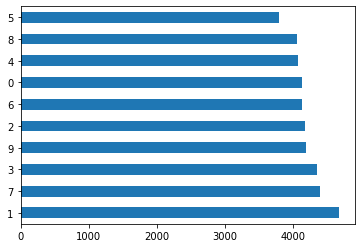

In [4]:
labels_count = df.label.value_counts()
print(labels_count)
df['label'].value_counts().plot(kind='barh')

###**5. Data Preprocessing**

####**Checking for Missing Values**

As per the below result, there are no missing values in the dataset taken.

In [5]:
print(df.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


####**Splitting X and Y**

We have now split the dataset into X and y, which are predictor and targets. X contains 784 columns of pixels of the images and y contains the labels of the correspoding images.

In [6]:
X = df.drop(columns= {'label'})
y =  df[['label']]
print(X.shape, y.shape)

(42000, 784) (42000, 1)


####**Training and Test Datasets Split**

The data split is as follows:

Taining data - 80%

Test data - 20%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

###**KNN (K - Nearest Neighbour)**

K Nearest Neighbor is one of the fundamental algorithms in machine learning which is mostly used for classification.
It classifies the data point on how its neighbor is classified.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

**Implementing KNN**

Below are the steps taken to implement KNN:
1. First, we have taken a range of 30 numbers with interval 2, for k-value.
2. We are implementing the model on all these k-values and storing the accuracy at each value.
3. Now , comparing the k-value taken and it's correspoding accuracy of the model, we choose a k-value that gives maximum accuracy.


In [9]:
kVals = range(1, 30, 2)
accuracies = []

for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	KNNmodel = KNeighborsClassifier(n_neighbors=k)
	KNNmodel.fit(X_train, y_train)

	# evaluate the model and update the accuracies list
	evalKNN = KNNmodel.score(X_test, y_test)
	print("k=%d, accuracy=%.2f%%" % (k, evalKNN * 100))
	accuracies.append(evalKNN)

# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%%" % (kVals[i], accuracies[i] * 100))

k=1, accuracy=96.45%
k=3, accuracy=96.43%
k=5, accuracy=96.42%
k=7, accuracy=96.31%
k=9, accuracy=96.18%
k=11, accuracy=95.83%
k=13, accuracy=95.70%
k=15, accuracy=95.51%
k=17, accuracy=95.37%
k=19, accuracy=95.21%
k=21, accuracy=94.99%
k=23, accuracy=94.80%
k=25, accuracy=94.76%
k=27, accuracy=94.62%
k=29, accuracy=94.58%
k=1 achieved highest accuracy of 96.45%


With the K-value that achieved highest accuracy, we are now re-training our model and predict on the test data

In [10]:
KNNBestmodel = KNeighborsClassifier(n_neighbors=kVals[i])
KNNBestmodel.fit(X_train, y_train)
pred = KNNBestmodel.predict(X_test)

Below are the samples from test data showing the true lables(i.e, from test dataset) and the predicted labels. 

In [11]:
print("True Labels: ",y_test[:10])
print("Predicted Labels: ",pred[:10])

True Labels:  [1 4 6 3 0 9 4 5 4 1]
Predicted Labels:  [1 9 6 3 0 9 4 5 4 1]


**Evaluating Model Performance**

Calculating the accuracy of this model, we have achieved an accuracy of 96.90%. We can also observe the classification report demonstrating the accuracy.

In [12]:
print(KNNBestmodel.score(X_test,y_test))
final_pred=[]
final_pred.append(round((KNNBestmodel.score(X_test,y_test))*100,2))

0.9645238095238096


In [13]:
# show a final classification report demonstrating the accuracy of the classifier
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       810
           1       0.96      0.99      0.97       937
           2       0.97      0.95      0.96       837
           3       0.96      0.95      0.95       882
           4       0.98      0.95      0.97       798
           5       0.96      0.96      0.96       767
           6       0.98      0.98      0.98       839
           7       0.95      0.97      0.96       872
           8       0.98      0.93      0.96       832
           9       0.94      0.96      0.95       826

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



**Confusion Matrix**

Confusion matrix can be very helpful to see your model drawbacks and behavior.

Below is the confusion matrix plotted to understand the how our model is performing on the given data. Here, we can also observe how many labels does our model is predicting correctly.

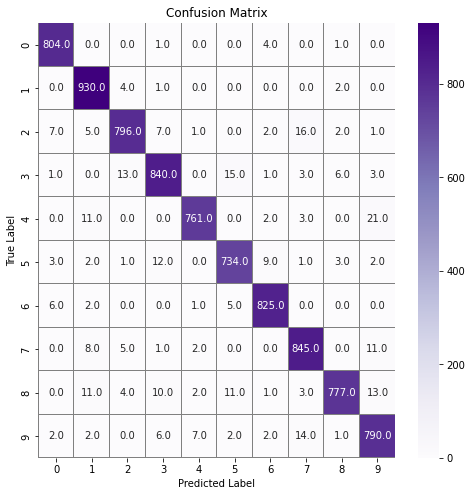

In [14]:
confusion_mtx = confusion_matrix(y_test, pred) 
# plot the confusion matrix
fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

###**SVM (Support Vector Machine)**

SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

In [15]:
from sklearn.svm import SVC

In this step, we are building a Non-linear Support Vector Machine on our MNIST dataset to classify the handwritten images to digits 0-9. We have taken hyperparameters as - 'rbf' kernel , C=1 and a default value of gama.

In [16]:
non_linear_model = SVC(kernel='rbf')

non_linear_model.fit(X_train, y_train)

y_pred_SVC = non_linear_model.predict(X_test)

Below are the samples from test data showing the true lables(i.e, from test dataset) and the predicted labels. 

In [17]:
print("True Labels: ",y_test[:10])
print("Predicted Labels: ",y_pred_SVC[:10])

True Labels:  [1 4 6 3 0 9 4 5 4 1]
Predicted Labels:  [1 4 6 3 0 9 4 5 4 1]


**Evaluating Model Performance**

Calculating the accuracy of this non-linear SVM model, we have achieved an accuracy of 97.51%.

In [18]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_SVC), "\n")
final_pred.append(round((metrics.accuracy_score(y_true=y_test, y_pred=y_pred_SVC))*100,2))
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_SVC))

accuracy: 0.9733333333333334 

[[802   0   1   0   0   1   4   0   2   0]
 [  0 922   7   2   0   0   0   0   5   1]
 [  4   2 810   4   3   0   1   5   7   1]
 [  0   2  12 844   0  10   0   1   9   4]
 [  1   3   0   0 775   0   0   2   2  15]
 [  2   2   1   8   2 743   5   1   3   0]
 [  3   2   1   0   1   3 828   0   1   0]
 [  0   2   8   0   5   2   0 848   0   7]
 [  0   5   2   4   5   0   4   0 809   3]
 [  3   1   0   4   6   0   1  12   4 795]]


**Confusion Matrix**

Confusion matrix can be very helpful to see your model drawbacks and behavior.

Below is the confusion matrix plotted to understand the how our model is performing on the given data. Here, we can also observe how many labels does our model is predicting correctly.

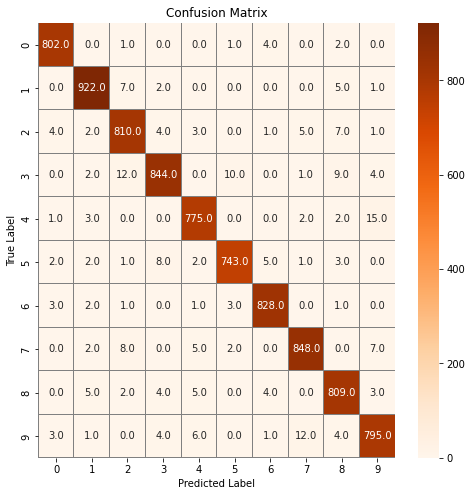

In [19]:
confusion_mtx = confusion_matrix(y_test, y_pred_SVC) 
# plot the confusion matrix
fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

###**Convolutional Neural Networks (CNN)**

####**Preparing Data for CNN**

***Reshape***

We reshape all training and test data to 3D matrices into 28x28x1 format. Because Keras needs an extra dimension in the end which is for channel. Since we are using grayscaled images we use only 1 channel.

In [20]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (33600, 28, 28, 1)
X_test shape: (8400, 28, 28, 1)


***Normalizing Data***

The pixel values of each image in the dataset ranges between 0 to 255, which are unsigned integers. So in this step, we are normalizing these pixel values, i.e, rescaling them to a range 0 to 1. 

We are first converting the datatype to floats and then dividing each pixel value by 255 which is maximum value.

In [22]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [23]:
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

Max value in X_train: 1.0
Min value in X_train: 0.0


***One Hot Encoding Label Column***

That target value we have contains 10 digits from 0 to 9 with different fonts. To categorize this data we are using one hot encoding in such a way that each value contains 0's and 1's based on it value.

Therefore we have converted the lables to one hot vectors, which we can see in the below example.

In [24]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("Example of a value in y_train:", y_train[0])

Shape of y_train: (33600, 10)
Example of a value in y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


####**Viewing Training and Test Samples**

Displaying the numbers from our randomly shuffled training and test datasets

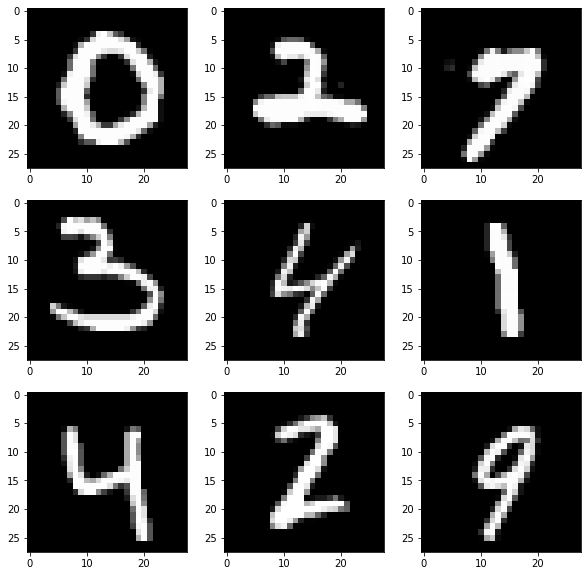

In [25]:
tr_samp = shuffle(X_train[:100]) #Randomly shuffle
fig,ax = plt.subplots(3,3 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(9):
    img = np.reshape(tr_samp[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="gray")

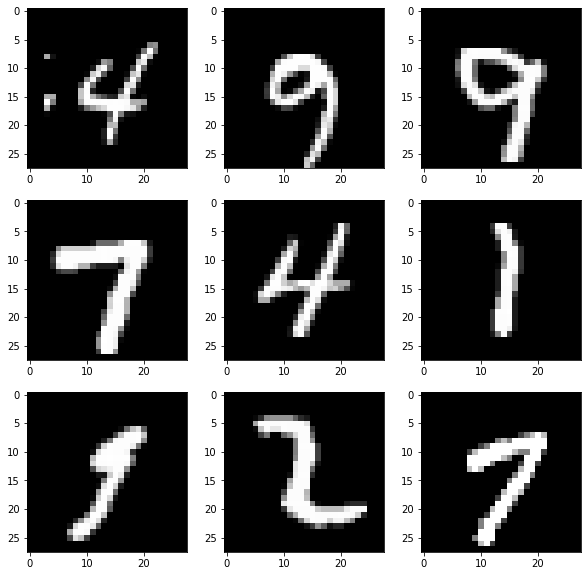

In [26]:
ts_samp = shuffle(X_test[:100]) 
fig,ax = plt.subplots(3,3 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(9):
    img = np.reshape(ts_samp[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="gray")

####**Building CNN**

#####**CNN**

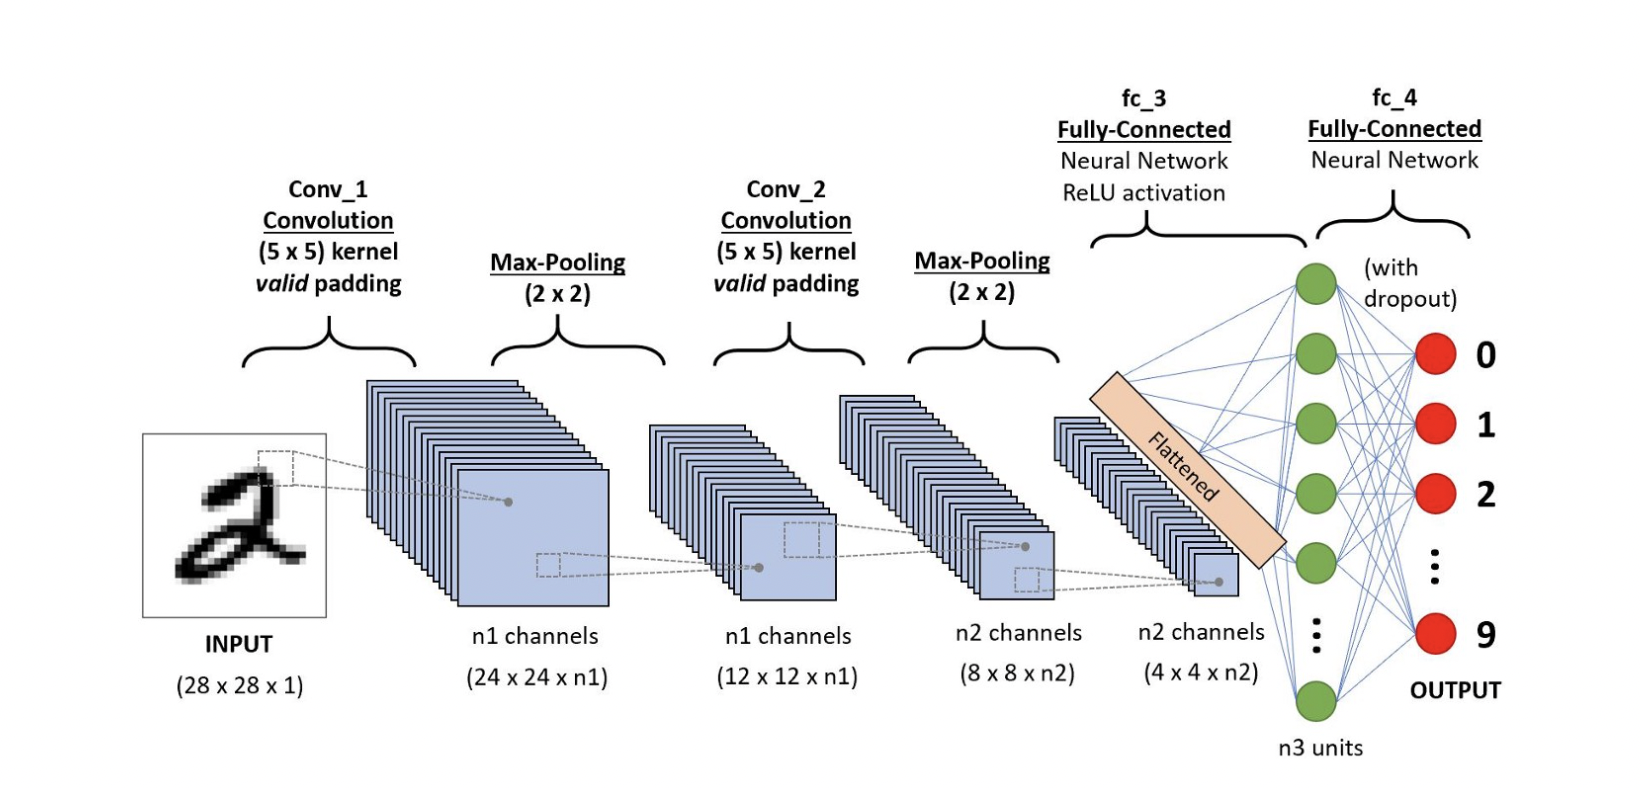

**Convolution**

Convolution is the operation that is performed between the input image and a ***filter*** of size(MXM). By sliding the filter over the image, a dot product is taken between filters and parts of the input image with respect to size of filter. The output is formed as a ***feature map*** which gives us information such as edges and corners.

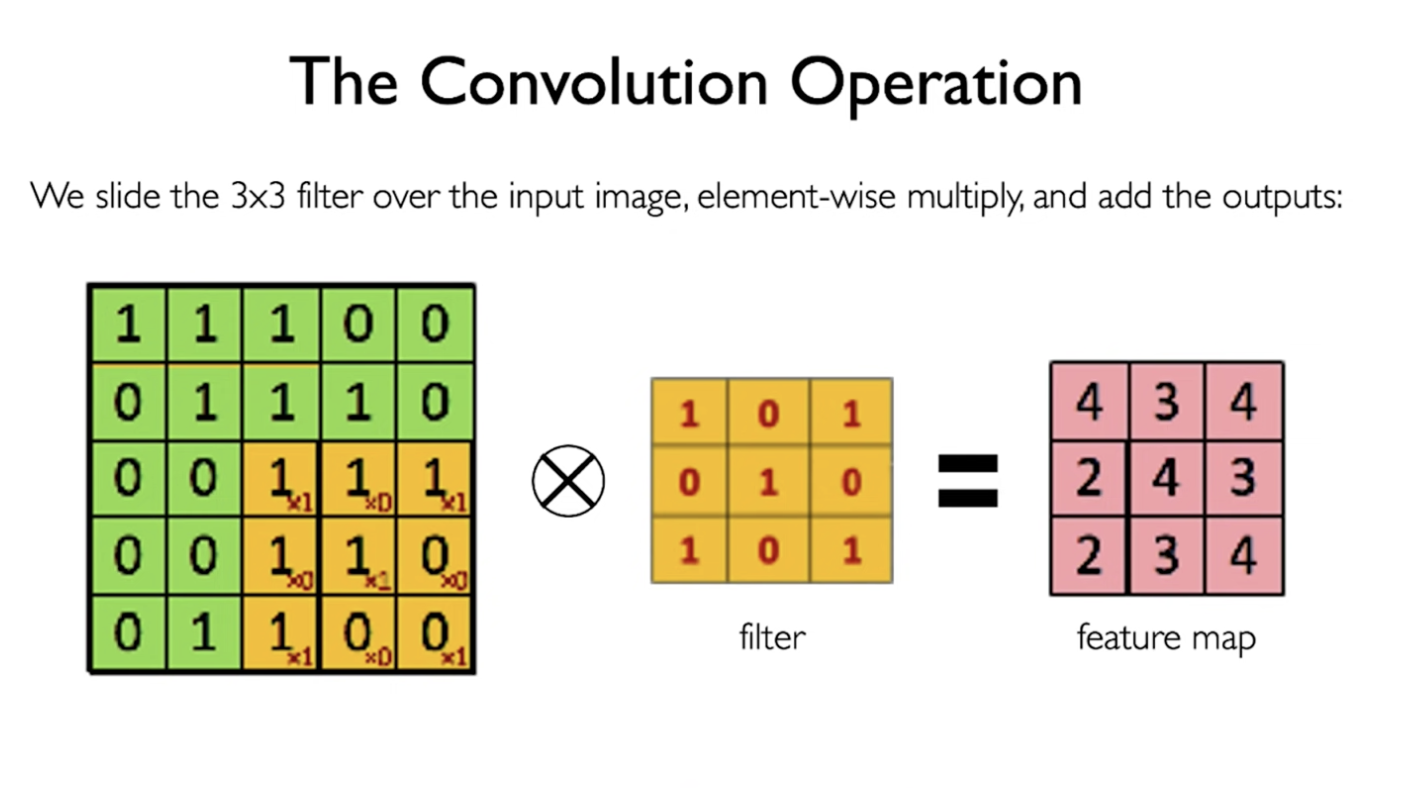

We basically have a image and feature detector which is 3X3 filter in our example. The feature detector detects the edges or convex shapes.

**Pooling**

This is used to reduce dimensionality of our inputs or feature maps while still preserving spatial invariance. In most cases, convolution layer is followed by a pooling layer. This is performed by decreasing the connections between layers and independently operates on each feature map.

***Max pooling*** is a technique where the largest element is taken from the feature map. 

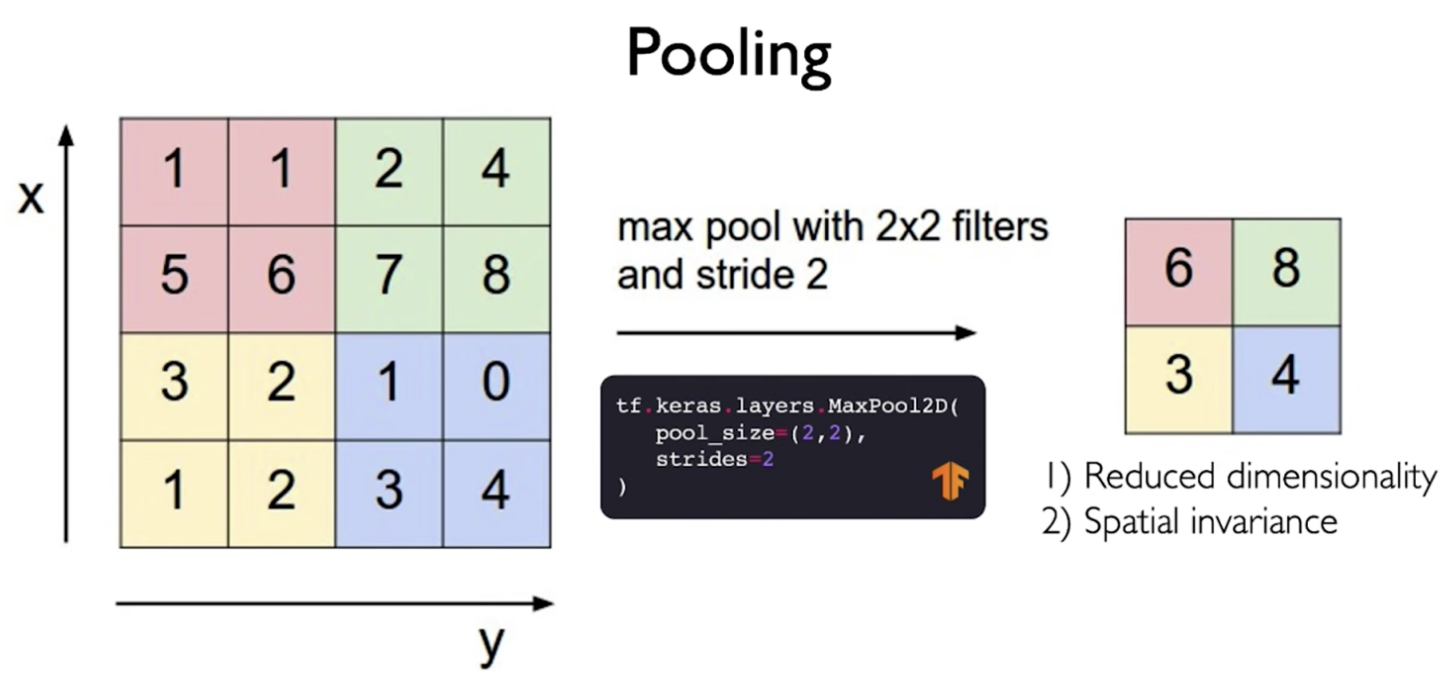

It makes the detection of features invariant to scale or orientation changes. It reduces the computation in the network, and hence to also control overfitting.

**Flatten**

The output from pooling layer is then sent to faltten, which flattens the data and feds to fully connected layer.

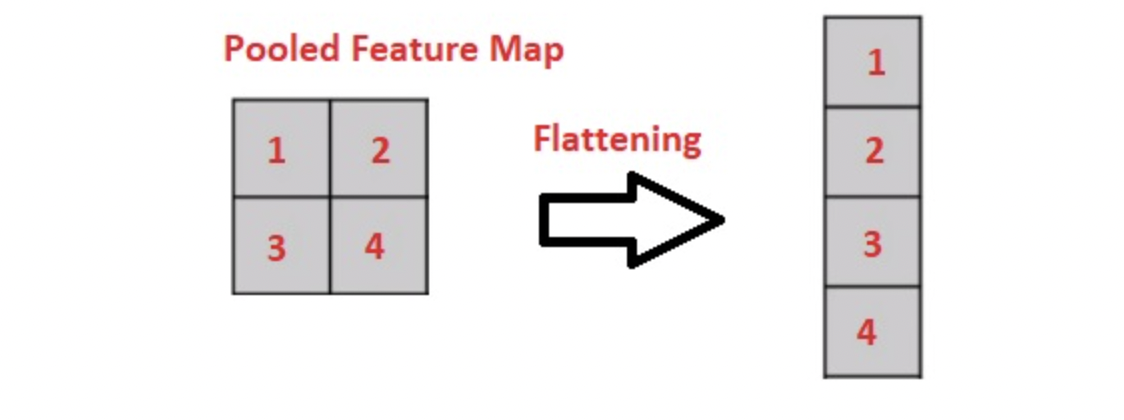

**Full Connection**

The Fully Connected layer consists of weights and biases along with neurons and is used to connect the neurons between 2 different layers. These layers are usually before the output layer and from the last few layers of CNN architecture. In this layer, the input image from the previous layers are flattened and fed to FC layers. The flattened vector then undergoes few more FC layers when the mathematical function operations usually takes place. Here the classification process begins.

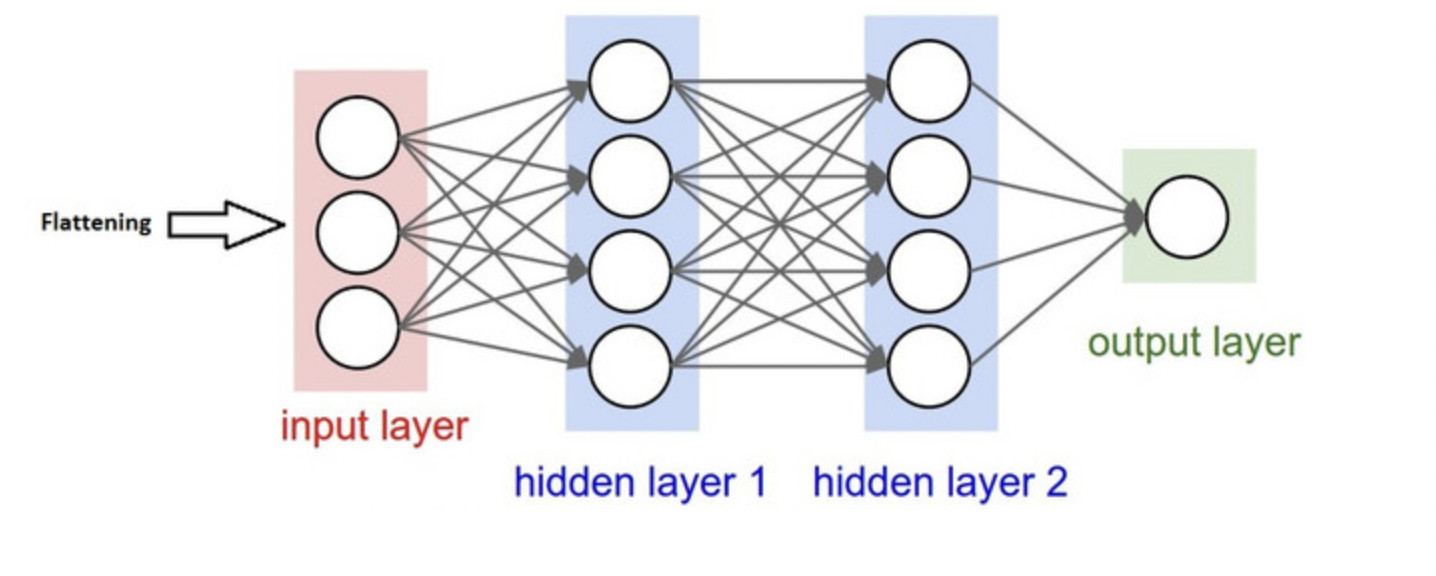



**Regularization in CNN**

Regularization is a technique that constraints our optimization problems such that it discourages these complex models from actually being learned and overfit. Therefore, our model can be generalized on unseen data.

The most popular forms of regularization are:

***Dropout***

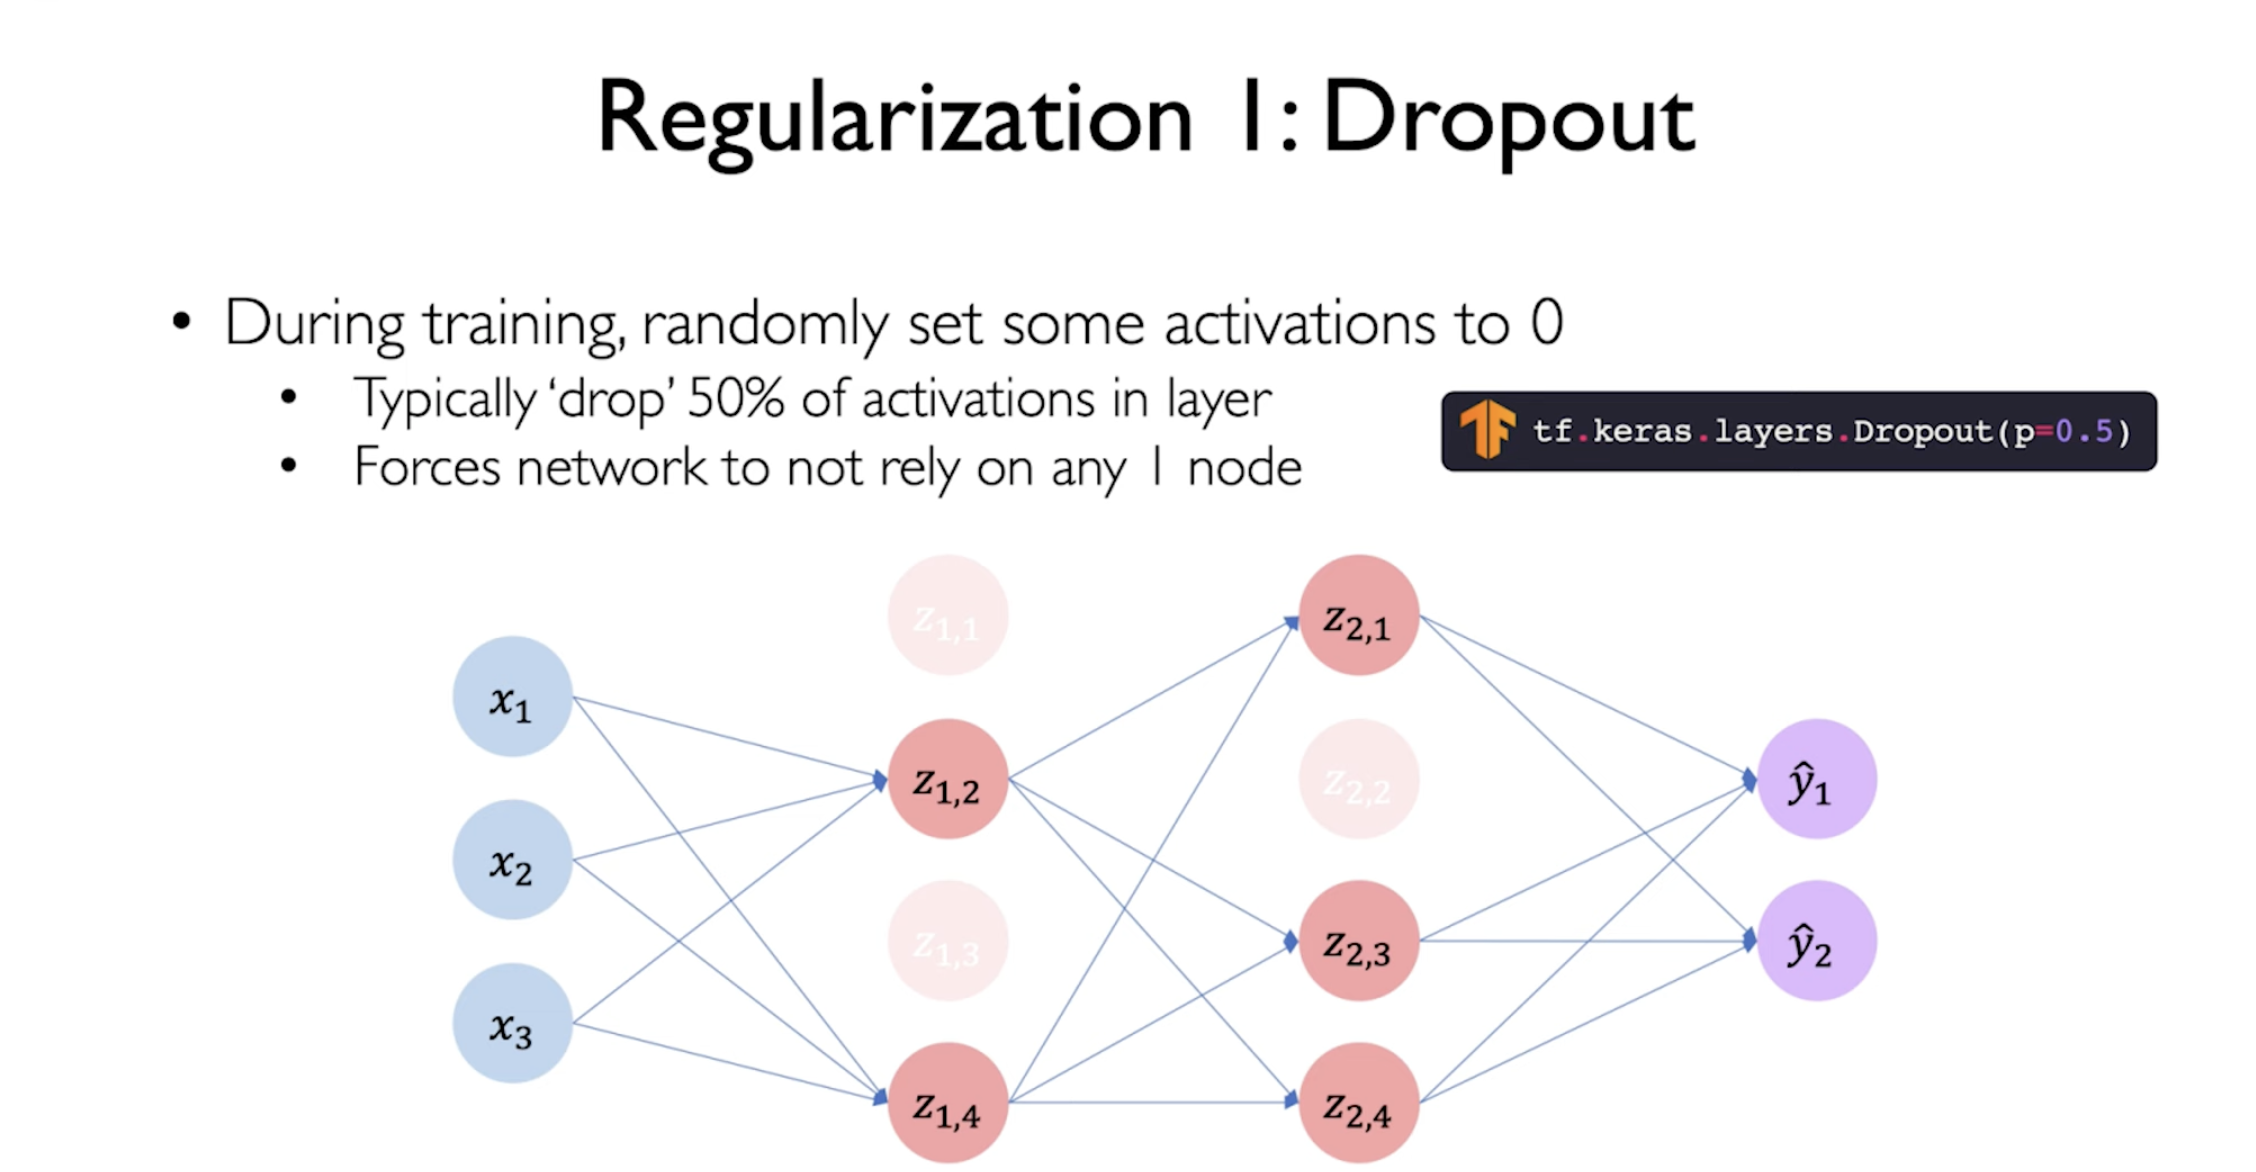


During training, randomly set some activations to zero. Typically 50% of activations in layer are taken into consideration. It forces the network to not rely on any one node and for the next iteration we drop a different set of neurons, this forces the network to learn how to take different pathways to get to its answer and it can't rely on any one pathway too.



***Early Stopping***
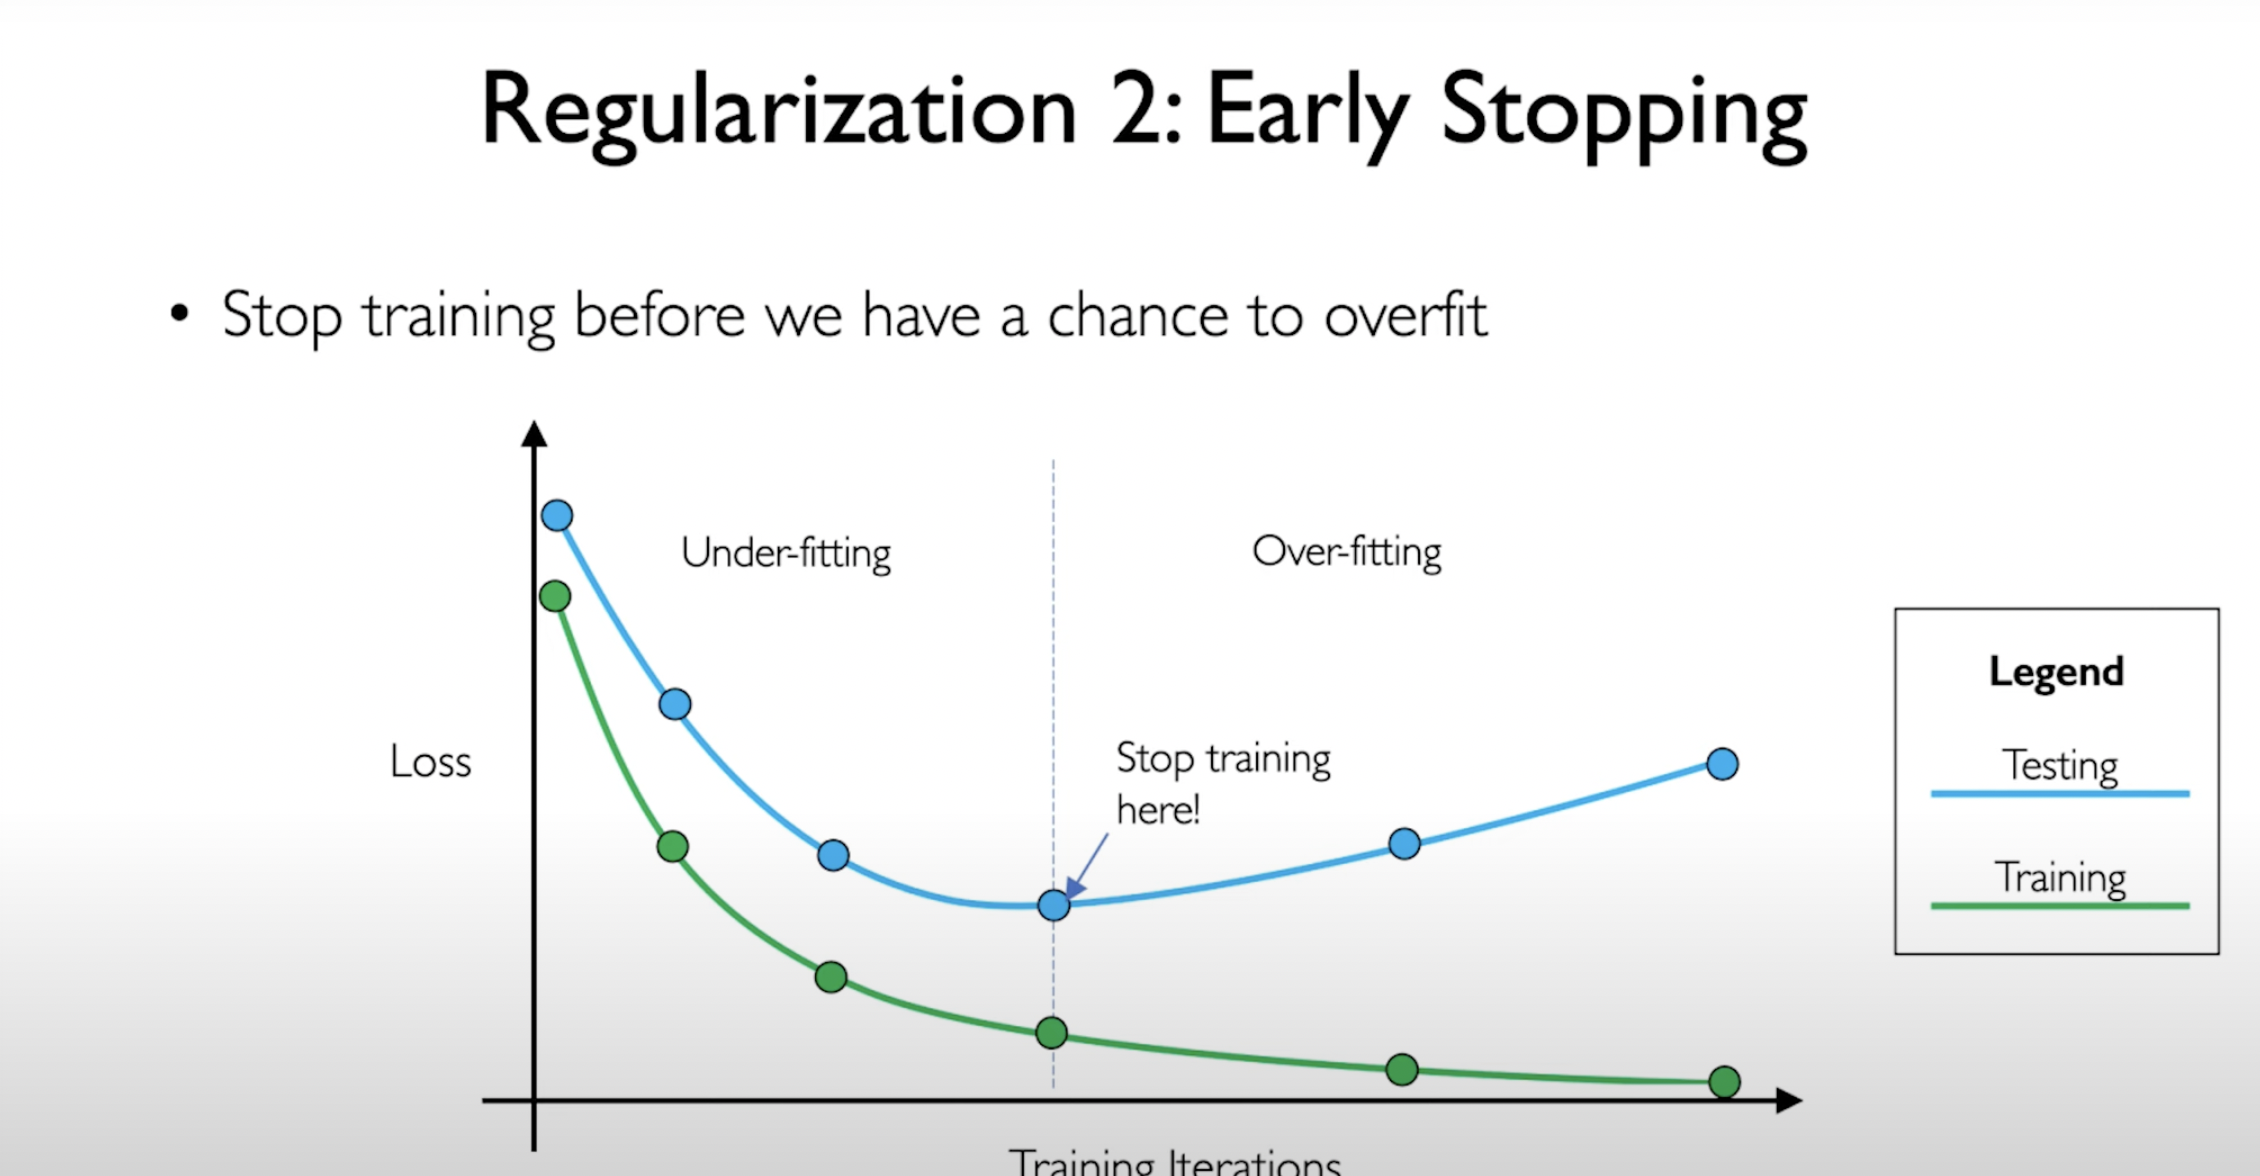


Stop the training before we have chance to i.e, stop when we realize that our loss is increasing on our test dataset.


#####**Basic CNN Model**

**Below are the steps we have taken to build this CNN:**

1. We have initialized the model.
2. Added a Convolutional layer with 32 filters of size 3X3 and 'relu' activation function
3. Added a Maxpooling layer of size 2X2
4. Added a Convlution layer again but with 62 filters of size 3X3 and 'relu' activation function
5. Again added a Maxpooling layer of size 2X2
6. Applied a dropout with 0.2 probability
7. Flattened the layer
8. Added a Fully Connected Layer with 1024 units and 'relu' activation function
9. Added a Fully Connected layer with 10 units and 'softmax' activation function

In [34]:
def dispAcc(historymodel):
  acc = historymodel.history["accuracy"] # report of model
  val_acc = historymodel.history["val_accuracy"] # history of validation data
  loss = historymodel.history["loss"] # Training loss
  val_loss = historymodel.history["val_loss"] # validation loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1) # 2 rows and 1 columns
  plt.subplot(2,1,1)
  #plotting respective accuracy
  plt.plot(acc,label="Training Accuracy")
  plt.plot(val_acc, label="Validation Acccuracy")
  plt.plot(val_loss, label = "Validation Loss")
  plt.legend()
  plt.ylabel("Accuracy", fontsize=12)

In [28]:
#Basic CNN Model
CNNmodel_Basic = Sequential() 

CNNmodel_Basic.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
CNNmodel_Basic.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel_Basic.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
CNNmodel_Basic.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel_Basic.add(Dropout(rate=0.2))

CNNmodel_Basic.add(Flatten())

CNNmodel_Basic.add(Dense(1024, activation="relu"))
CNNmodel_Basic.add(Dense(10, activation="softmax"))

In [29]:
CNNmodel_Basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

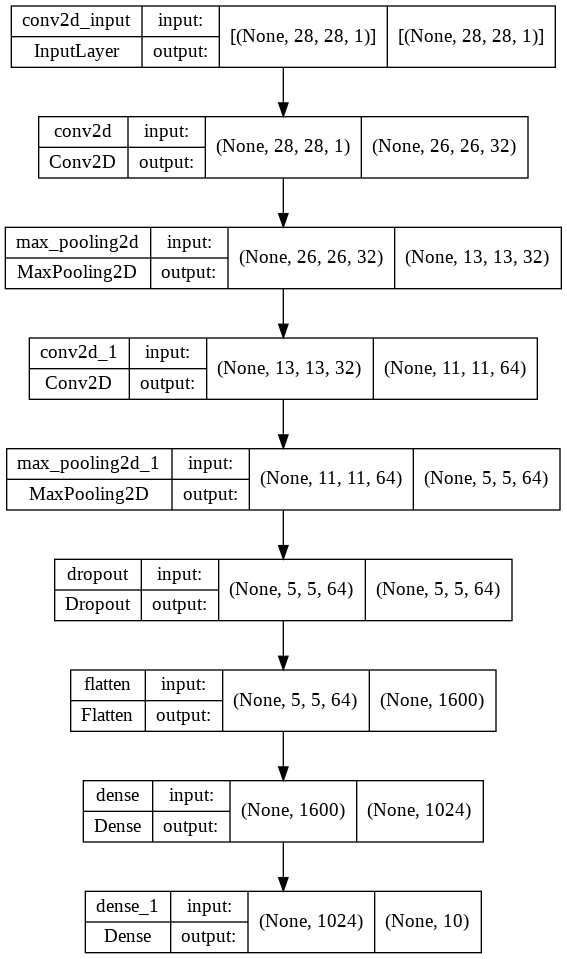

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(CNNmodel_Basic, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

**Defining parameters**

We have taken 10 Epochs , 32 as the batchsize, and 'SGD' as optimizer. We can also take other optimizers like Adam, etc

In [31]:
Optimizer="SGD"
BatchSize = 32
Epochs = 10

**Method to display accuracy plots**

**Implementing CNN**

In [32]:
# Compile the model
CNNmodel_Basic.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=Optimizer)

We have then trained out CNN model with the training data taking 10 Epochs and 32 as batchsize. We have also implemented the Earlystopping , which is allow the system to avoid overfitting and loss.

In [35]:
# Fit the model
historyres=CNNmodel_Basic.fit( x=X_train, y=y_train, batch_size=BatchSize, epochs=Epochs, validation_split = 0.3)

Epoch 1/10
735/735 [==============================] - 36s 48ms/step - loss: 0.1398 - accuracy: 0.9574 - val_loss: 0.1092 - val_accuracy: 0.9646
Epoch 2/10
735/735 [==============================] - 39s 53ms/step - loss: 0.1189 - accuracy: 0.9619 - val_loss: 0.0938 - val_accuracy: 0.9692
Epoch 3/10
735/735 [==============================] - 38s 52ms/step - loss: 0.1053 - accuracy: 0.9668 - val_loss: 0.0869 - val_accuracy: 0.9725
Epoch 4/10
735/735 [==============================] - 37s 51ms/step - loss: 0.0939 - accuracy: 0.9711 - val_loss: 0.0777 - val_accuracy: 0.9763
Epoch 5/10
735/735 [==============================] - 37s 50ms/step - loss: 0.0862 - accuracy: 0.9738 - val_loss: 0.0707 - val_accuracy: 0.9775
Epoch 6/10
735/735 [==============================] - 37s 51ms/step - loss: 0.0781 - accuracy: 0.9760 - val_loss: 0.0765 - val_accuracy: 0.9737
Epoch 7/10
735/735 [==============================] - 37s 50ms/step - loss: 0.0734 - accuracy: 0.9780 - val_loss: 0.0631 - val_accuracy:

**Predicting using the built model**


From the CNN model implemented above, we have now utilized the model to predict the lables correctly on test data. Here we have take a sample of 3 images and our model has performed well by predicting all the three images correctly.

Predicted Label:  1
True Label:  1


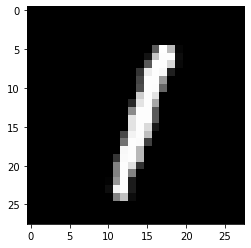

Predicted Label:  9
True Label:  4


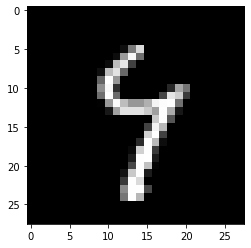

Predicted Label:  6
True Label:  6


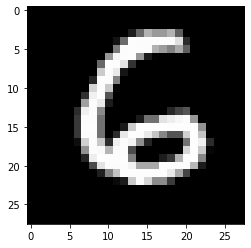

In [36]:
#predicting the charecters using trained model
for i in range(3):
    y_pred_Basic = CNNmodel_Basic.predict(X_test[i].reshape(1, 28, 28, 1))
    print("Predicted Label: ",y_pred_Basic.argmax())
    print("True Label: ",y_test[i].argmax())
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.show()

**Evaluating Model Performance**

We have acquired a good accuracy greater than 95%, which is approximately 98%. 

In [37]:
#Evaluating model accuracy on test data
evalAcc = CNNmodel_Basic.evaluate(X_test,y_test, batch_size = 64,verbose = 0)
print(f"Test Accuracy:{round(evalAcc[1],4)*100}%")
final_pred.append(round((evalAcc[1])*100,2))

Test Accuracy:97.92%


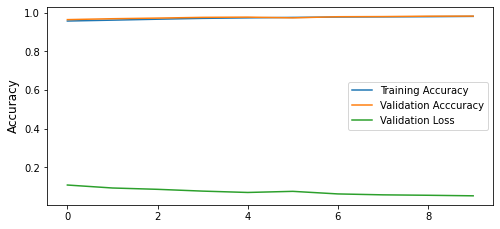

In [38]:
dispAcc(historyres)

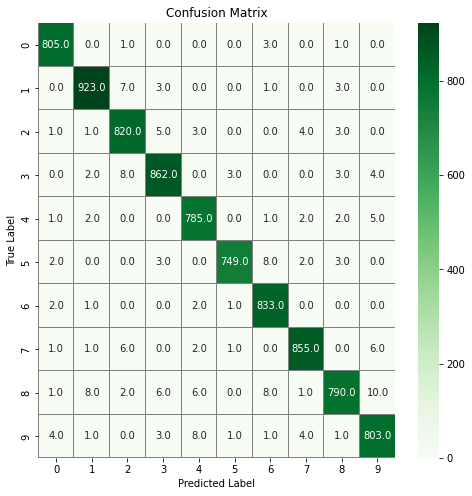

In [39]:
Y_pred_CNNBasic = CNNmodel_Basic.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred_CNNBasic,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [40]:
from sklearn.model_selection import KFold

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = CNNmodel_Basic
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [41]:
scores, hists = evaluate_model(X_train,y_train)

> 98.705
> 99.315
> 99.539
> 99.643
> 99.792


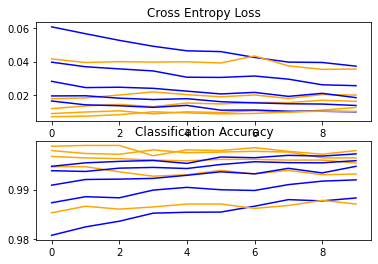

In [42]:
summarize_diagnostics(hists)

#####**Improved CNN Model**

From the basic model we have achieved a good accuracy, but we can improve our model performance by implementing few steps.

Below are some of the improvements we are going to do on our basic CNN model.

1. Data Augmentation
2. Changing the Network Architecture
3. Changing the parameters


**Data Augmentation**



In [43]:
#data augmentation
data_aug = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

data_aug.fit(X_train)

**Changing Network Architecture and Increasing Epochs**

We are now changing the network architecture by adding an extra convolution layer to increase the model depth. Also, adding batchnormalization.Changed optimizer, i.e , using Adam optimizer.

Also we are icnreasing the number of epochs to improve the model performance. Taken 20 Epcohs and 64 as batchsize.

In [44]:
CNNmodel_Impv = Sequential() 

CNNmodel_Impv.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
CNNmodel_Impv.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel_Impv.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
CNNmodel_Impv.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
CNNmodel_Impv.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel_Impv.add(Dropout(rate=0.2))
CNNmodel_Impv.add(Flatten())

CNNmodel_Impv.add(Dense(1024, activation="relu"))
CNNmodel_Impv.add(BatchNormalization())
CNNmodel_Impv.add(Dense(10, activation="softmax"))

In [45]:
CNNmodel_Impv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)         

***Defining Parameters***

In [46]:
Optimizer="Adam"
BatchSize = 64
Epochs = 20

**Implementing the model**

In [47]:
# Compile the model
CNNmodel_Impv.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=Optimizer)

# Use earlystopping
callback = EarlyStopping(monitor="val_loss", mode="min",patience=5, restore_best_weights = True)

In [48]:
# Fit the model
historyres_Impv = CNNmodel_Impv.fit_generator(data_aug.flow(X_train,y_train, batch_size=BatchSize),
                              epochs = Epochs, validation_data = (X_test,y_test), steps_per_epoch=X_train.shape[0] // BatchSize, callbacks = [callback])
#historyres_Impv=CNNmodel_Impv.fit( x=X_train, y=y_train, batch_size=BatchSize, epochs=Epochs, validation_split = 0.3, callbacks = [callback])

Epoch 1/20
525/525 [==============================] - 65s 122ms/step - loss: 0.2477 - accuracy: 0.9226 - val_loss: 0.1926 - val_accuracy: 0.9413
Epoch 2/20
525/525 [==============================] - 64s 122ms/step - loss: 0.1003 - accuracy: 0.9690 - val_loss: 0.1008 - val_accuracy: 0.9719
Epoch 3/20
525/525 [==============================] - 63s 121ms/step - loss: 0.0783 - accuracy: 0.9757 - val_loss: 0.0699 - val_accuracy: 0.9787
Epoch 4/20
525/525 [==============================] - 64s 121ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0373 - val_accuracy: 0.9885
Epoch 5/20
525/525 [==============================] - 64s 121ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 6/20
525/525 [==============================] - 64s 121ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 7/20
525/525 [==============================] - 64s 121ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0370 - val_ac

**Predicting using the built model**

Predicted Label:  1
True Label:  1


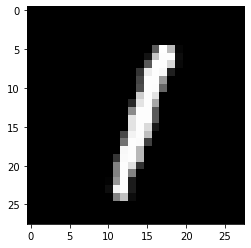

Predicted Label:  4
True Label:  4


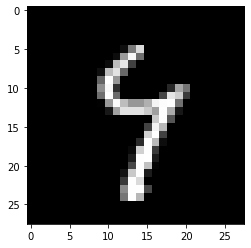

Predicted Label:  6
True Label:  6


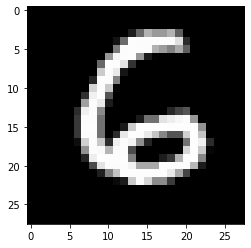

In [49]:
#predicting the charecters using trained model
for i in range(3):
    y_pred_Impv = CNNmodel_Impv.predict(X_test[i].reshape(1, 28, 28, 1))
    print("Predicted Label: ",y_pred_Impv.argmax())
    print("True Label: ",y_test[i].argmax())
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.show()

**Evaluating Model Performance**

In [50]:
#Evaluating model accuracy on test data
evalAccOfImpvCNN = CNNmodel_Impv.evaluate(X_test,y_test, batch_size = 64,verbose = 0)
print(f"Test Accuracy:{round(evalAccOfImpvCNN[1],4)*100}%")
final_pred.append(round((evalAccOfImpvCNN[1])*100,2))

Test Accuracy:99.26%


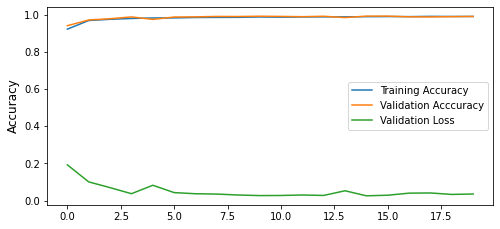

In [51]:
dispAcc(historyres_Impv)

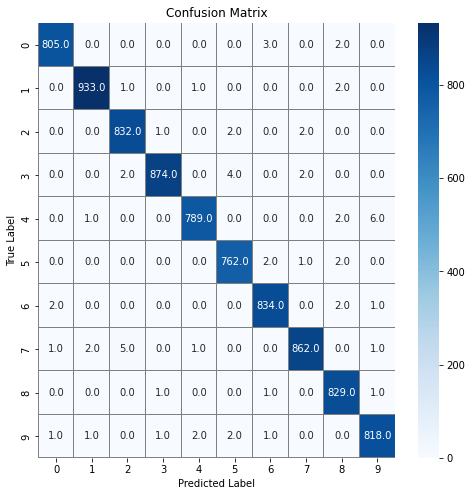

In [52]:
Y_pred_CNNImpv = CNNmodel_Impv.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred_CNNImpv,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [53]:
from sklearn.model_selection import KFold

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = CNNmodel_Impv
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [54]:
scores, hists = evaluate_model(X_train,y_train)

> 99.182
> 99.449
> 99.717
> 99.807
> 99.896


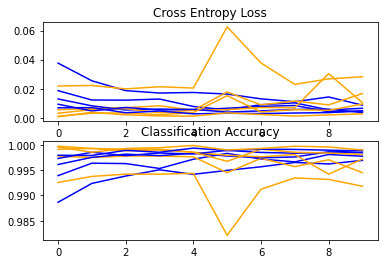

In [55]:
summarize_diagnostics(hists)

###**Comparison of KNN, SVM and CNN**

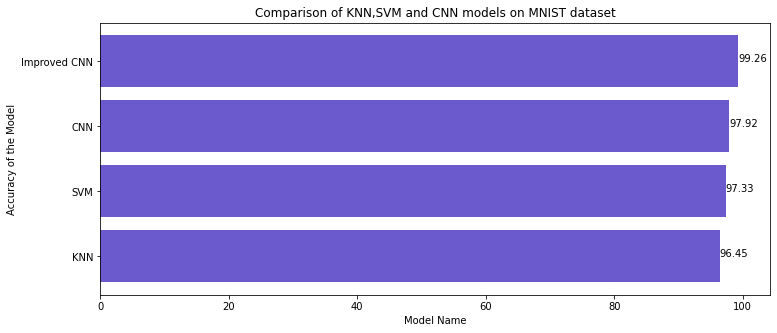

In [56]:
models=['KNN', 'SVM', 'CNN', 'Improved CNN']
plt.figure(figsize=(12,5))
plt.barh(models,final_pred,color='slateblue')
for index, value in enumerate(final_pred):
  plt.text(value, index,str(value))
  # setting label of y-axis
  plt.ylabel("Accuracy of the Model")
  # setting label of x-axis
  plt.xlabel("Model Name")
  plt.title("Comparison of KNN,SVM and CNN models on MNIST dataset")
plt.show()

###**Conclusion**

Implemented Convolutional Neural Network (CNN) using Keras API on MNIST dataset with an accuracy of 99%.
 
Evaluated the model using k-fold cross validation and Confusion Matrix.
 
Built an improved CNN model by changing hyper-parameters and network architecture to get better image classification and visualized the accuracy and loss graphs using Matplotlib for evaluating the models because of which the accuracy improved by more than 1 %.
 
KNN, SVM and CNN models were compared and improved CNN was found out to give the best accuracy

###**References**

https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial/notebook

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://medium.com/analytics-vidhya/a-beginners-guide-to-knn-and-mnist-handwritten-digits-recognition-using-knn-from-scratch-df6fb982748a

https://www.youtube.com/watch?v=5tvmMX8r_OM

https://www.youtube.com/watch?v=AjtX1N_VT9E

Copyright (c) 2022 Satya Sri Sowmya Chinimilli and Aravinda Sagiraju

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.